In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
date_finder = session.query(Measurement.date)
date_finder_max = max(date_finder)
date_finder_max

('2017-08-23',)

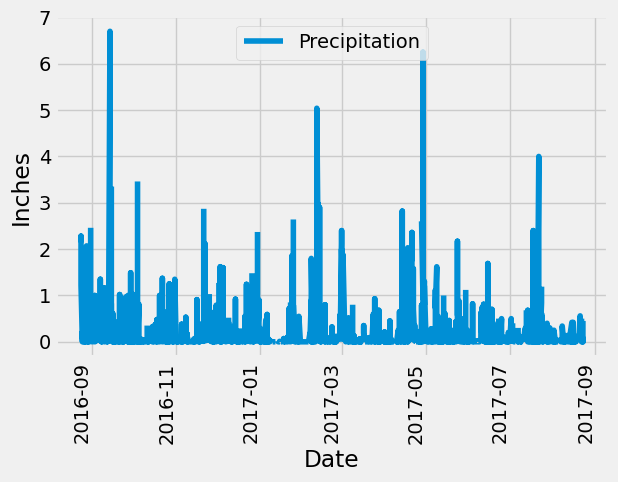

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
max_date = dt.datetime.strptime(date_finder_max[0], '%Y-%m-%d' )

# Calculate the date one year from the last date in data set.
min_date = max_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date < max_date).\
    filter(Measurement.date > min_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prec_data, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date', inplace=True)
df.plot()
plt.legend(loc=9)
plt.ylabel('Inches')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()